# CAMISIM simulation

What does CAMISIM do?
1) Design of microbiome community 
2) Simulation of metagenome sequence data 
3) Postprocessing to provide gold-standard files 

## 1. Design of microbiome community

Two ways to design community:

_de novo_ - sampling of available genome sequences in their default directory. 
_user given taxonomic profile_ - input is a list of NCBI complete genomes (bacteria, archaeal, eukaryotes and viruses) in biom format.

**Input P<sub>in</sub>:**

Pairs of every genome _t_ and its abundance _ab<sub>t</sub>_.


**Output P<sub>out</sub>:**

Abundance profiles of genomes in the community.

**Algorithm for P<sub>in</sub> to P<sub>out</sub>:**
1) Map genome set to taxonomic set (F). 
2) Use input F as P<sub>in</sub> along with the maximum number of strains (_m_) per F and highest taxonomic rank. 
3) For a given F, find a set of all available complete genome sequences in its taxonomic lineage. If not found exclude F from the community design, otherwise proceed to the next step. 
4) Decide on the number of genomes to be selected from previous list of complete genomes based on truncated geometric distribution (G<sub>i</sub>) as shown below, where $\mu$=_m_/2 and _k_ < _m_.

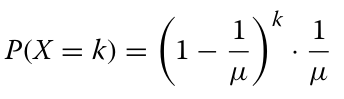


5) Generate random numbers (Y<sub>_i_</sub>) from Lognormal($\mu$=1,$\sigma$=2) for each selected genome and obtain ab<sub>_i_</sub> by using below formula.

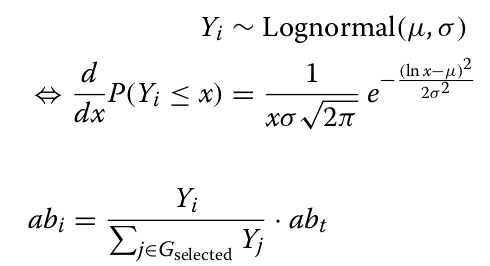

6) Return P<sub>out</sub> as pairs of G<sub>i</sub> and ab<sub>i</sub>.


For _de novo_ community design, additional parameters are needed: g<sub>real</sub> and g<sub>tot</sub>

1) If g<sub>tot</sub> > g<sub>real</sub>, sgEvolver is used to simulate strain genomes. The number of genomes to be simulated is determined from geometric distribution ($\mu$=0.3<sup>-1</sup>) (given for point 4 above).

2) Abundances (4 modes):\
    (i) Single sample - relative abundances are drawn from Lognormal($\mu$=1,$\sigma$=2). \
    (ii) Differential abundance mode - use single sample abundance approach for each of the _n_ differential mode. \
    (iii) Multiple samples - generate D<sub>0</sub> as per single sample approach and use Gaussian noise to generate relative abundances for _n_ samples <sup>*</sup>.

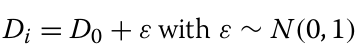
    

(iv) Time series - Markov model-like simulation is used with D<sub>_i_-1</sub> and Gaussian noise as given below.

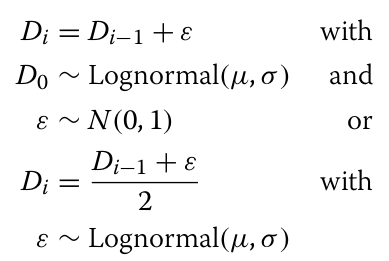

<sup>*</sup> applied to generate simulated dataset for metagenome binning.

# 2. Metagenome simulation

For each pair in P<sub>out</sub> (_t_, _ab<sub>t</sub>_), find the number of reads (n<sub>_t_</sub>) to be generated for each genome in samples. For this, genome size _s<sub>t</sub>_ is used as given below, where _n_ is total reads in a sample.

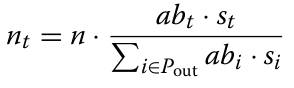

Default, ART (Illumina 2_x_150 bp paired end) with HiSeq 2500 error profile is used to simulate reads from genome sequence of _t_.

**Output:**

FASTQ file for simulated reads and BAM files for alignment between reads and reference genomes.

# 3. Postprocessing

SAMtool is used on BAM files to generate *mpileup* output to find genomic regions that have a coverage of at least 1. These regions are extracted and labeled as error-free **contigs** (input for binning).

All sequences are suffled and anonymized to provide gold-standard files for assembly and binning.
